In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# Reading Data

In [4]:
df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")
y = df['num']
X = df.drop('num', axis = 1)

In [5]:
# As the number of rows are very less , 
# converting this problem into binary classification

In [6]:
df['num'] = df['num'].replace(2,1)
df['num'] = df['num'].replace(3,1)
df['num'] = df['num'].replace(4,1)

In [7]:
y = df['num']

In [8]:
y.value_counts()

num
1    509
0    411
Name: count, dtype: int64

In [9]:
X.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [10]:
X.shape

(920, 15)

In [11]:
y.shape

(920,)

In [12]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [14]:
int_col = X.select_dtypes(include = ['int32', 'int64', 'float64'])

In [15]:
int_col

,id,age,trestbps,chol,thalch,oldpeak,ca
0,1,63,145.0,233.0,150.0,2.3,0.0
1,2,67,160.0,286.0,108.0,1.5,3.0
2,3,67,120.0,229.0,129.0,2.6,2.0
3,4,37,130.0,250.0,187.0,3.5,0.0
4,5,41,130.0,204.0,172.0,1.4,0.0
...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN
916,917,62,NaN,139.0,NaN,NaN,NaN
917,918,55,122.0,223.0,100.0,0.0,NaN
918,919,58,NaN,385.0,NaN,NaN,NaN


In [16]:
cat_col =  X.select_dtypes(include = ['object']).columns
print(cat_col)

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [17]:
# check nulls in dataset
X.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

# Check Data distribution to determine best way of imputing missing values

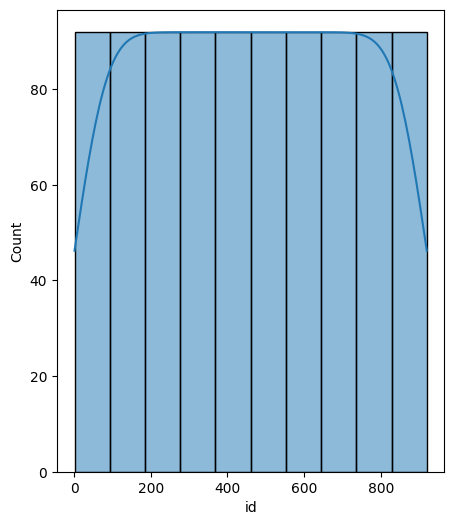

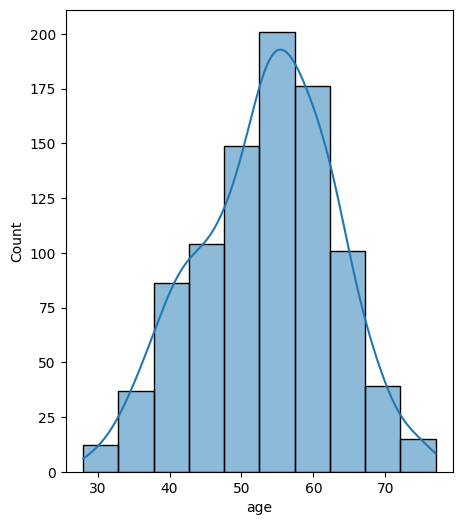

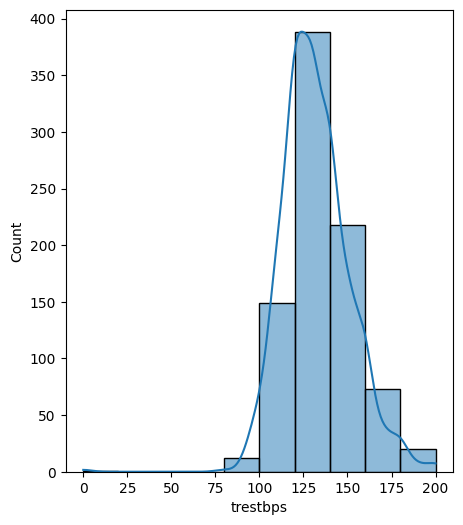

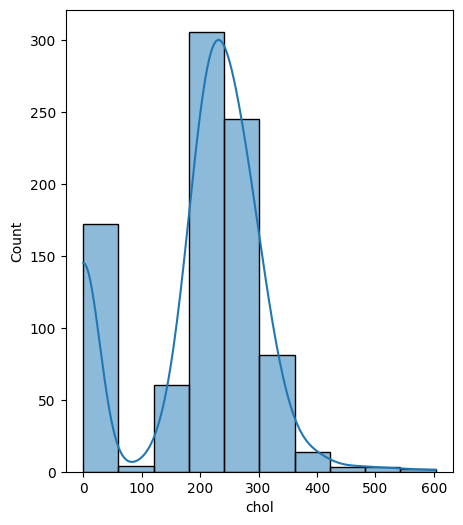

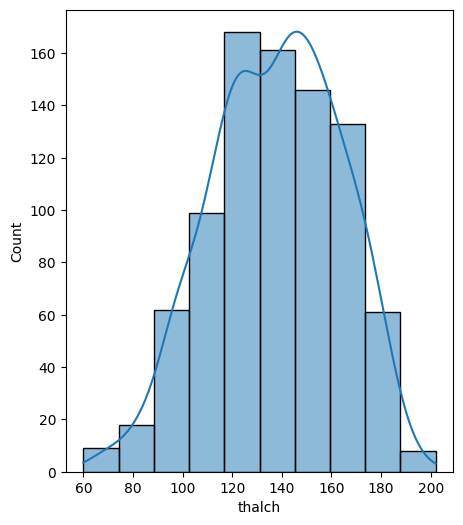

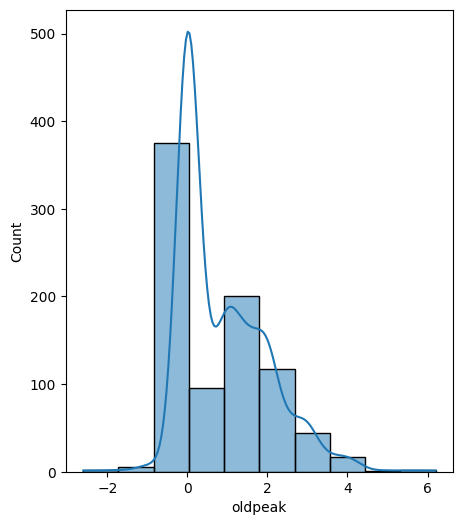

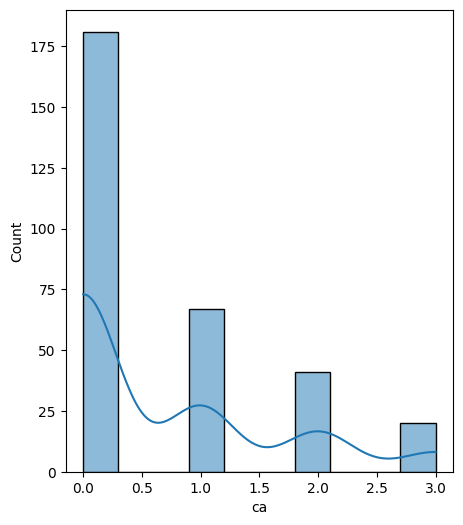

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

for col in X.columns:
    if col in int_col:
        plt.figure(figsize = (5,6))
        sns.histplot(X[col], kde = True, bins = 10)
        plt.xlabel(col)
        plt.show()

In [19]:
#trestbps, chol, oldpeak, thalch all are almost normal distributed, can be mode imputed nulls,
# as missing values are very few 

The issue is with how you're using .mode()—it returns a Series, not a single value. You need to extract the first value from that Series before using it in fillna.
there can be more than 1 mode

In [20]:
X['trestbps'].fillna(X['trestbps'].mode()[0], inplace = True)
X['chol'].fillna(X['chol'].mode()[0], inplace = True)
X['oldpeak'].fillna(X['oldpeak'].mode()[0], inplace = True)
X['thalch'].fillna(X['thalch'].mode()[0], inplace = True)

In [21]:
# fill missing cells with mode as only < 100 cells missing
# sex,fbs, exang
X['fbs'].fillna(X['fbs'].mode()[0], inplace = True)
X['exang'].fillna(X['exang'].mode()[0], inplace = True)
X['restecg'].fillna(X['restecg'].mode()[0], inplace = True)
    
X['slope'] = X['slope'].fillna('unknown')
X['thal'] = X['thal'].fillna('unknown')
X['ca'] = X['ca'].replace(np.nan, -1)

In [22]:
X.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [23]:
X.drop('id', axis =1, inplace = True)

In [25]:
# Handling boolean columns
X['sex'] = X['sex'].replace('Male', 1)
X['sex'] = X['sex'].replace('Female', 0)

X['fbs'] = X['fbs'].replace(True, 1)
X['fbs'] = X['fbs'].replace(False, 0)

X['exang'] = X['exang'].replace(True, 1)
X['exang'] = X['exang'].replace(False, 0)


In [26]:
X.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [28]:
X.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect
1,67,1,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal
2,67,1,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect
3,37,1,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal
4,41,0,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal


Natural order:
Medically and in the dataset, the risk/severity interpretation is roughly:
* Slope
Upsloping (least risky / normal response)

Flat (intermediate)

Downsloping (most indicative of ischemia / higher risk)

Unknown → usually treated as missing (NaN)

upsloping → 0
flat      → 1
downsloping → 2
unknown  → NaN or -1

* restecg
0=normal 
1=ST-T wave abnormality 
2=left ventricular hypertrophy

# thal

* 0 normal <

* 1 fixed defect

* 2 reversible defect

* -1 unknown

# Ordinal Encoding of thal, cp, slope, restecg

In [29]:
# All mapping is done based on domain knowledge
slope_mapping = {'downsloping': 2, 'flat' :1, 'upsloping': 0, 'unknown' : -1 }
thal_mapping = {'normal' : 0, 'fixed defect' : 1, 'reversable defect' : 2, 'unknown' : -1 }
cp_mapping = {'typical angina': 0, 'atypical angina' : 1, 'non-anginal': 2, 'asymptomatic': 3}
restecg_mapping = {'normal' :0,'st-t abnormality': 1, 'lv hypertrophy': 2} 



X['slope_encoded'] = X['slope'].map(slope_mapping)
X['thal_encoded'] = X['thal'].map(thal_mapping)
X['cp_encoded'] = X['cp'].map(cp_mapping)
X['restecg_encoded'] = X['restecg'].map(restecg_mapping)


X.drop('slope', axis =1 , inplace = True)
X.drop('thal', axis =1 , inplace = True)
X.drop('cp', axis =1 , inplace = True)
X.drop('restecg', axis =1 , inplace = True)


In [30]:
X.columns

Index(['age', 'sex', 'dataset', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'ca', 'slope_encoded', 'thal_encoded', 'cp_encoded',
       'restecg_encoded'],
      dtype='object')

In [31]:
#One hot encode - dataset
dummies = pd.get_dummies(X['dataset'], drop_first = True, dtype = int)
X = pd.concat([X.drop('dataset', axis = 1), dummies], axis = 1)

In [32]:
X.dtypes

age                  int64
sex                  int64
trestbps           float64
chol               float64
fbs                  int64
thalch             float64
exang                int64
oldpeak            float64
ca                 float64
slope_encoded        int64
thal_encoded         int64
cp_encoded           int64
restecg_encoded      int64
Hungary              int64
Switzerland          int64
VA Long Beach        int64
dtype: object

In [33]:
X.isnull().sum()

age                0
sex                0
trestbps           0
chol               0
fbs                0
thalch             0
exang              0
oldpeak            0
ca                 0
slope_encoded      0
thal_encoded       0
cp_encoded         0
restecg_encoded    0
Hungary            0
Switzerland        0
VA Long Beach      0
dtype: int64

In [34]:
X.shape

(920, 16)

In [35]:
# Train-test-split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# XGBoost classifier

In [38]:
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV


XGB_classifier = XGBClassifier(class_weight='balanced', random_state = 42)

param_dist = {
 'n_estimators': randint(100, 500),         
    'max_depth': randint(3, 15),              
    'learning_rate': uniform(0.01, 0.3),       
    'subsample': uniform(0.6, 0.4),            
    'colsample_bytree': uniform(0.6, 0.4),     
    'gamma': uniform(0, 5),                   
    'reg_alpha': uniform(0, 1),               
    'reg_lambda': uniform(0, 1)   
}


random_search = RandomizedSearchCV(param_distributions = param_dist, 
                                   estimator = XGB_classifier, cv = 3, n_iter=20,random_state=42,
                                  scoring = 'recall')

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

In [39]:
y_pred = best_model.predict(X_test)

print("\nClassification Report for XGBClassifier :")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix for XGBClassifier:")
print(confusion_matrix(y_test, y_pred))


Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       120
           1       0.86      0.81      0.84       156

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.82      0.82       276


Confusion Matrix for XGBClassifier:
[[100  20]
 [ 29 127]]


# Adjusting Class imbalance - telling model class 1 is more important

In [40]:
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

scale_pos_weight = len(y_train[y_train==0])/ len(y_train[y_train==1])

XGB_classifier = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss',random_state = 42)

param_dist = {
 'n_estimators': randint(100, 500),         
    'max_depth': randint(3, 15),              
    'learning_rate': uniform(0.01, 0.3),       
    'subsample': uniform(0.6, 0.4),            
    'colsample_bytree': uniform(0.6, 0.4),     
    'gamma': uniform(0, 5),                   
    'reg_alpha': uniform(0, 1),               
    'reg_lambda': uniform(0, 1)   
}


random_search = RandomizedSearchCV(param_distributions = param_dist, 
                                   estimator = XGB_classifier, cv = 3, n_iter=20,random_state=42,
                                  scoring = 'recall')

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

In [41]:
y_pred = best_model.predict(X_test)

print("\nClassification Report for XGBClassifier :")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix for XGBClassifier:")
print(confusion_matrix(y_test, y_pred))


Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       120
           1       0.87      0.80      0.83       156

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276


Confusion Matrix for XGBClassifier:
[[101  19]
 [ 31 125]]


# Adding interaction features for improving recall

In [46]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Binary target: 0 = no disease, 1 = any disease (num 1-4)
y = y.apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Create interaction features
X_train['cp_slope'] = X_train['cp_encoded'] * X_train['slope_encoded']
X_test['cp_slope']  = X_test['cp_encoded'] * X_test['slope_encoded']

X_train['oldpeak_high'] = (X_train['oldpeak'] > 1.0).astype(int)
X_test['oldpeak_high']  = (X_test['oldpeak'] > 1.0).astype(int)

model = XGBClassifier(
    max_depth=3,
    min_child_weight=1,
    n_estimators=150,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

#  Adjust threshold to increase recall
threshold = 0.45
y_pred = (y_pred_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       123
           1       0.83      0.88      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

[[ 96  27]
 [ 19 134]]


# Summary
* Recall for class 1 - diseased class has improved significantly from 0.80 to 0.88 which is basically meaning that the model predicts diseased people better
* Recall for class 0 got a bit low from 0.84 to 0.78 , but that is far less risky as compared to class 1